# **ID: 2125051059**
# **Name: Sadia Akter**

# **STEP: 01**

In [126]:
# prompt: Apply image classification techniques on it(conventional and CNN) to train a model that can classify vehicles from their images.

In [127]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
base_dir = "/content/drive/MyDrive/Machine Learning Lab/ML Lab Project/vehicle-type-recognition"

In [130]:
# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

In [131]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)


train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 221 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


In [132]:
# CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax') # Output layer with number of classes
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10, # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.3581 - loss: 2.7143 - val_accuracy: 0.2188 - val_loss: 1.3519
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1875 - loss: 1.3318

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.1875 - loss: 1.3318 - val_accuracy: 0.4091 - val_loss: 1.3157
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3933 - loss: 1.3052
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 630ms/step - accuracy: 0.4688 - loss: 1.1482 - val_accuracy: 0.3125 - val_loss: 1.3033
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4259 - loss: 1.1999 - val_accuracy: 0.4545 - val_loss: 1.1524
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2188 - loss: 1.2491
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4706 - loss: 1.2086 - val_accuracy: 0.5938 - val_loss: 1.2124
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4375 - loss: 1.1497 - val_accuracy: 0.5455 - val_loss: 1.0089
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4923 - loss: 1.1752
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 461ms/step - accuracy: 0.4062 - loss: 1.1366 - val_accuracy: 0.5312 - val_loss: 1.1173


In [134]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Loss: 1.1165
Validation Accuracy: 0.6296


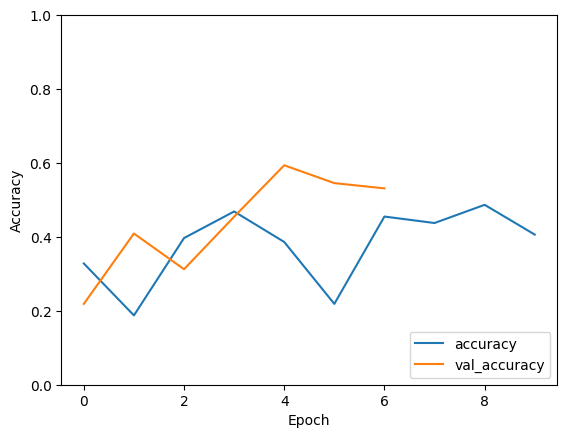

In [135]:

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()




# **STEP: 02**

In [136]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

In [137]:
# Set parameters
image_size = (128, 128)
batch_size = 32
epochs = 30

In [139]:
# Define dataset path
from google.colab import drive
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/Machine Learning Lab/ML Lab Project/vehicle-type-recognition"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2,  # 20% of data for validation
    rotation_range=30,  # Rotate images by up to 30 degrees
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.3,  # Zoom transformations
    horizontal_flip=True,  # Flip images horizontally
    fill_mode="nearest",  # Fill empty pixels with nearest values
)


In [141]:
# Load training and validation datasets
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    seed=42,
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    seed=42,
)


Found 221 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


In [142]:
# Get class names
class_names = list(train_data.class_indices.keys())
print(f"Class names: {class_names}")


Class names: ['Bus', 'Car', 'Truck', 'motorcycle']


In [143]:
# Build the enhanced CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax'),
])


In [144]:
# Compile the model with an adaptive learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


In [146]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping],
)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3122 - loss: 12.2637 - val_accuracy: 0.5185 - val_loss: 1.6388 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5241 - loss: 9.1401 - val_accuracy: 0.2407 - val_loss: 3.8746 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4549 - loss: 6.4216 - val_accuracy: 0.1852 - val_loss: 3.8142 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4888 - loss: 5.5589
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4911 - loss: 5.4975 - val_accuracy: 0.1852 - val_loss: 4.1427 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5372 - loss: 3.3130 - val_accuracy: 0.2222 - val_loss: 5.0850 - learning_rate: 2.0000e-04
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4360 - loss: 3.3289 - val_accuracy: 0.1481 - v

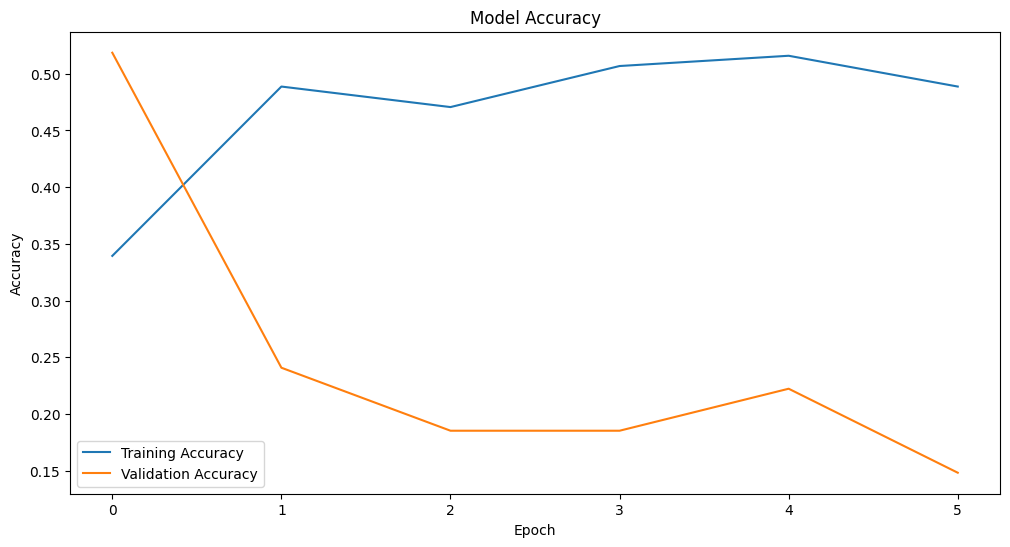

In [147]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


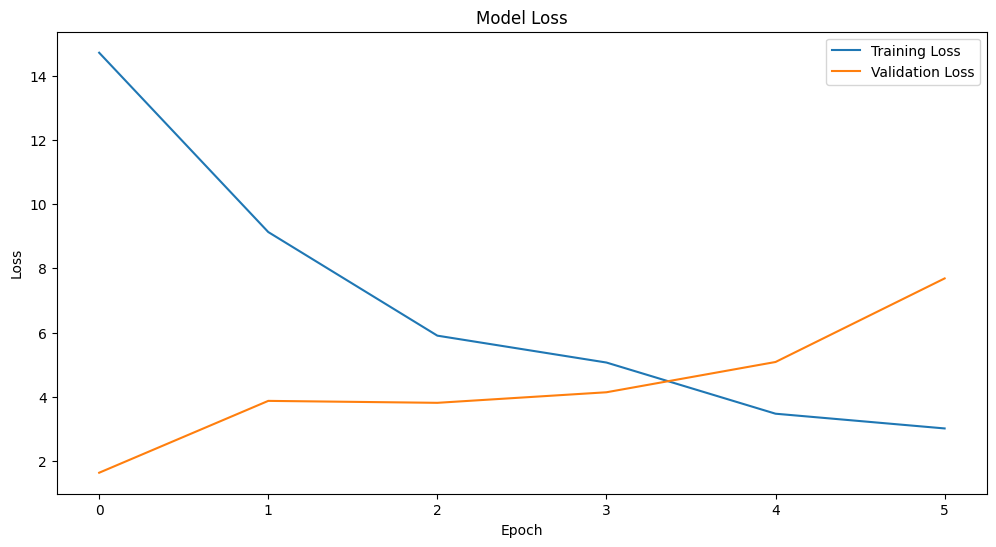

In [148]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [149]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 678ms/step - accuracy: 0.4194 - loss: 1.8314
Validation Accuracy: 42.59%


# **STEP: 03**

In [150]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D


In [153]:
# Load the pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

In [154]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [155]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)


In [156]:
# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [157]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [158]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[reduce_lr, early_stopping],
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.2748 - loss: 1.5943 - val_accuracy: 0.3519 - val_loss: 1.2077 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.3777 - loss: 1.2889 - val_accuracy: 0.3704 - val_loss: 1.1846 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.3694 - loss: 1.2660 - val_accuracy: 0.4259 - val_loss: 1.1783 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.3123 - loss: 1.3501 - val_accuracy: 0.3704 - val_loss: 1.1650 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.3950 - loss: 1.3060 - val_accuracy: 0.4815 - val_loss: 1.1731 - learning_rate: 0.0010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3748 - loss: 1.2509 - val_accuracy: 0.5000 - val_loss: 1.1577 - learning_rate: 0.0010
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.3810 - loss: 1.2163 - val_accuracy: 0.4259 - val_l

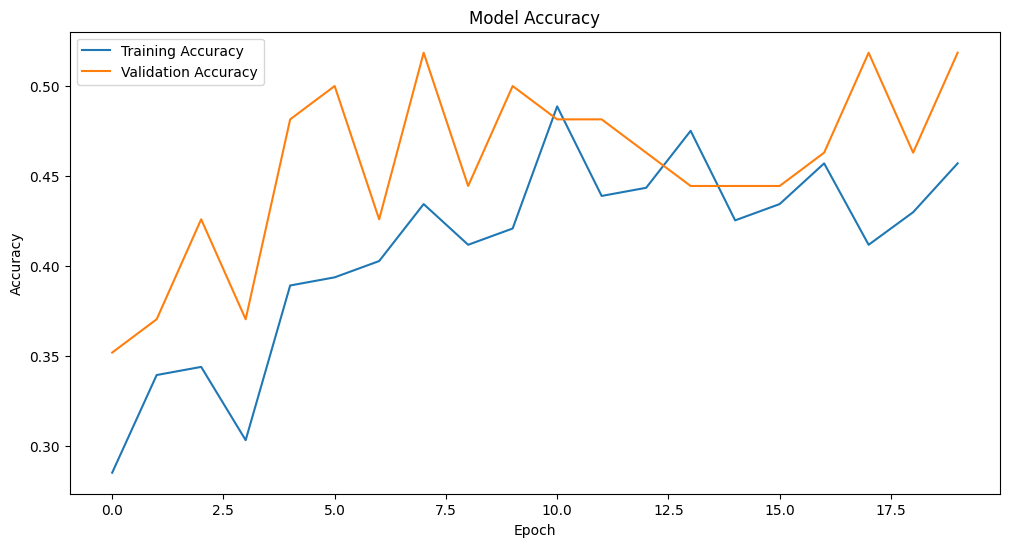

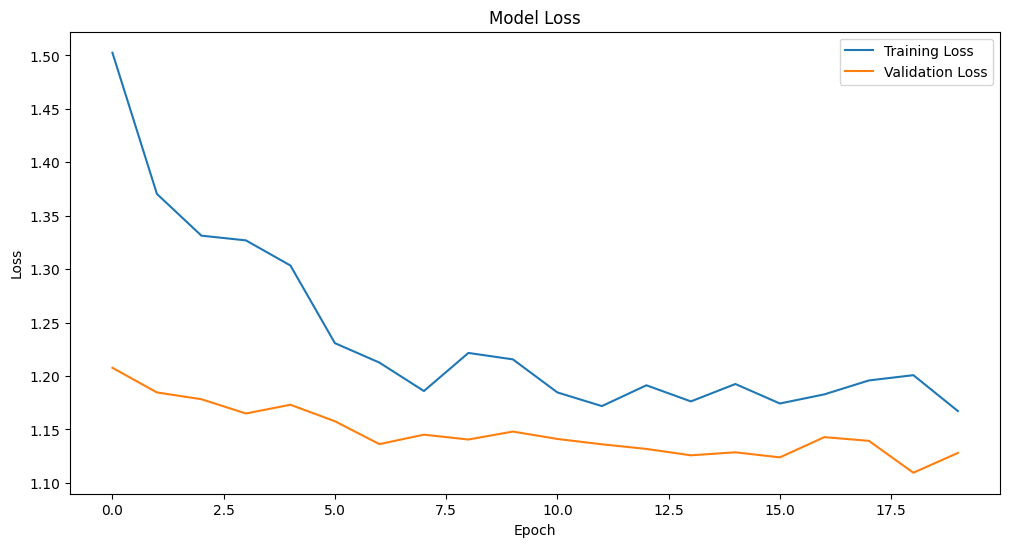

In [159]:
# Plot training/validation accuracy and loss as before
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [160]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")



2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5208 - loss: 1.1396
Validation Accuracy: 50.00%


# **STEP: 04**

In [161]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [162]:
# Set parameters
image_size = (128, 128)
batch_size = 32

In [163]:
# Define dataset path
dataset_path = "/content/drive/MyDrive/Machine Learning Lab/ML Lab Project/vehicle-type-recognition"


In [164]:
# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2,  # 20% of data for validation
)


In [165]:
# Load training and validation datasets
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    seed=42,
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    seed=42,
)


Found 221 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


In [166]:
# Get class names
class_names = list(train_data.class_indices.keys())
print(f"Class names: {class_names}")

Class names: ['Bus', 'Car', 'Truck', 'motorcycle']


In [167]:
# Load ResNet50 without the top layer
feature_extractor = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(image_size[0], image_size[1], 3))


In [168]:
# Extract features from images
def extract_features(data_generator):
    features = []
    labels = []
    for batch_images, batch_labels in data_generator:
        batch_features = feature_extractor.predict(batch_images, verbose=0)
        features.append(batch_features)
        labels.append(batch_labels)
        if len(features) * batch_images.shape[0] >= data_generator.samples:
            break
    features = np.vstack(features)
    labels = np.vstack(labels)
    return features, labels


In [169]:
# Extract features from training and validation data
print("Extracting training features...")
train_features, train_labels = extract_features(train_data)
print("Extracting validation features...")
val_features, val_labels = extract_features(val_data)


Extracting training features...
Extracting validation features...


In [170]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% variance
print("Applying PCA to training features...")
train_features_pca = pca.fit_transform(train_features)
print("Applying PCA to validation features...")
val_features_pca = pca.transform(val_features)


Applying PCA to training features...
Applying PCA to validation features...


In [171]:
# Train a Random Forest Classifier on extracted features
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features_pca, np.argmax(train_labels, axis=1))


Training Random Forest Classifier...


RandomForestClassifier(random_state=42)

In [172]:
# Make predictions and evaluate
print("Evaluating the model...")
val_predictions = rf_model.predict(val_features_pca)
val_accuracy = accuracy_score(np.argmax(val_labels, axis=1), val_predictions)
print(f"Validation Accuracy with Feature Engineering: {val_accuracy * 100:.2f}%")


Evaluating the model...
Validation Accuracy with Feature Engineering: 60.47%


In [173]:
# Classification report
print("\nClassification Report:")
print(classification_report(np.argmax(val_labels, axis=1), val_predictions, target_names=class_names))



Classification Report:
              precision    recall  f1-score   support

         Bus       0.00      0.00      0.00         3
         Car       0.50      0.27      0.35        22
       Truck       0.58      0.61      0.59        31
  motorcycle       0.66      0.90      0.76        30

    accuracy                           0.60        86
   macro avg       0.43      0.45      0.43        86
weighted avg       0.57      0.60      0.57        86



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


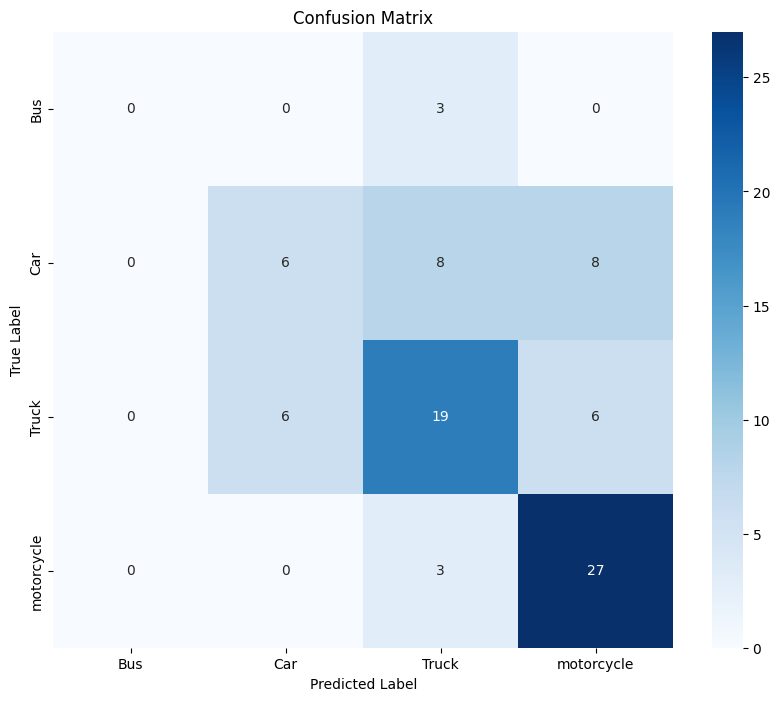

In [174]:
# Confusion matrix
conf_matrix = confusion_matrix(np.argmax(val_labels, axis=1), val_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


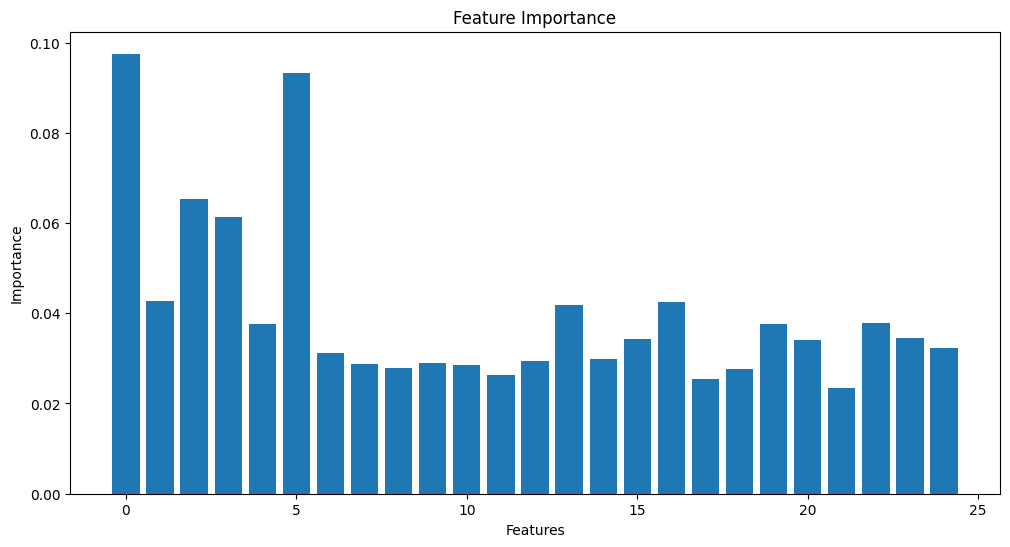

In [175]:
# Feature importance (if PCA is skipped, directly from Random Forest)
importances = rf_model.feature_importances_
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



# **STEP: 05**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set parameters
image_size = (128, 128)
batch_size = 32
import os

In [176]:
dataset_path = "/content/drive/MyDrive/Machine Learning Lab/ML Lab Project/vehicle-type-recognition"


In [177]:
# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2,  # 20% of data for validation
)


In [178]:
# Load training and validation datasets
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    seed=42,
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    seed=42,
)


Found 221 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


In [179]:
# Get class names
class_names = list(train_data.class_indices.keys())
print(f"Class names: {class_names}")


Class names: ['Bus', 'Car', 'Truck', 'motorcycle']


In [180]:
# Load ResNet50 without the top layer for feature extraction
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
output = Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=output)


In [181]:
# Freeze ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False


In [182]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [183]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    batch_size=batch_size,
    verbose=1,
)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.2706 - loss: 1.8376 - val_accuracy: 0.6296 - val_loss: 1.1348
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5216 - loss: 1.3200 - val_accuracy: 0.5741 - val_loss: 0.9869
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6773 - loss: 0.9089 - val_accuracy: 0.6296 - val_loss: 0.9618
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6388 - loss: 0.8233 - val_accuracy: 0.6111 - val_loss: 0.9040
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6967 - loss: 0.7976 - val_accuracy: 0.6852 - val_loss: 0.8052
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7376 - loss: 0.7173 - val_accuracy: 0.6852 - val_loss: 0.8125
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7295 - loss: 0.6857 - val_accuracy: 0.6111 - val_loss: 0.8840
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6589 - loss: 0.8274 - val_accuracy: 0.7037 - val_loss: 0.8024
Epoch 9/10
7/7 ━━━━

In [184]:
# Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

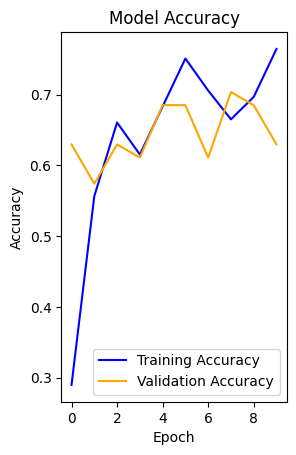

In [185]:
# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

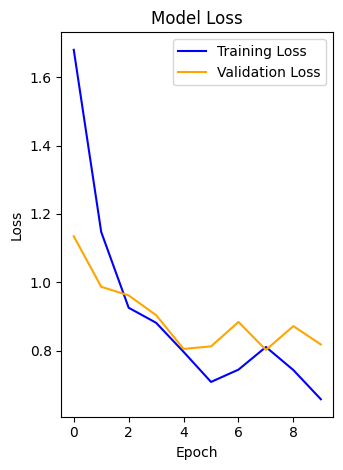

In [186]:
# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [187]:
# Final Validation Accuracy and Loss
val_loss, val_accuracy = model.evaluate(val_data, verbose=0)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Final Validation Loss: {val_loss:.4f}")


Final Validation Accuracy: 62.96%
Final Validation Loss: 0.8182
